In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
import warnings 
warnings.filterwarnings("ignore")

In [21]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [22]:
data=pd.DataFrame(df)

In [23]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
df.shape

(506, 14)

In [26]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [28]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [33]:
def detect_outliers(df):
  cols = list(df)
  outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
  for column in cols:
    if column in df.select_dtypes(include=np.number).columns:
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      iqr = q3 - q1
      fence_low = q1 - (1.5*iqr)
      fence_high = q3 + (1.5*iqr)
      outliers = pd.concat([outliers, pd.DataFrame({'Feature': [column], 'Number of Outliers': [df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]]})], ignore_index=True)
  return outliers

In [36]:
detect_outliers(data)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


In [37]:
from scipy.stats.mstats import winsorize

In [38]:
# Function to treat outliers 

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)

# Checking for outliers after applying winsorization
# We see this using a fuction called 'detect_outliers', defined above.

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,0
4,NOX,0
5,RM,0
6,AGE,0
7,DIS,0
8,RAD,0
9,TAX,0


In [43]:
x = df.iloc[:,:-1]

y = df.iloc[:,-1]
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
x= x[['CRIM','DIS','RM','LSTAT']]
x.head(2)
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [45]:
x.head()

,CRIM,DIS,RM,LSTAT
0,0.000000,0.490733,0.686656,0.066013
1,0.000000,0.654441,0.603458,0.280557
2,0.000000,0.654441,1.000000,0.017019
3,0.000439,0.858839,0.915181,0.000000
4,0.003833,0.858839,0.995678,0.084064


In [46]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
lr=LinearRegression()

lr.fit(xtrain, ytrain)

coefficients=pd.DataFrame([xtrain.columns, lr.coef_]).T
coefficients=coefficients.rename(columns={0:'Attributes',1:'Coefficients'})

In [49]:
coefficients

,Attributes,Coefficients
0,CRIM,-3.877522
1,DIS,-2.6488
2,RM,7.640161
3,LSTAT,-13.810714


In [50]:
y_pred=lr.predict(xtrain)

In [51]:
y_pred

array([27.30793235, 23.0056512 , 21.08390846, 24.69455997, 13.70771982,
       25.47135921, 30.72700895,  9.96593791, 21.87390623, 18.39190894,
       22.38520952, 26.60061016, 21.73711479, 24.04545944, 31.49161262,
       15.42851928, 18.37549955, 16.3281837 , 21.58985795, 24.22006249,
       23.41230807, 31.50763839, 21.11497084, 19.50428255, 24.69038933,
       29.1365772 , 31.14910946, 26.98872883, 11.21326769,  8.32323431,
       10.19869036, 16.31864364, 30.27202788, 27.71775889, 19.36234269,
       11.62629568, 29.65750356, 22.74555787, 20.6692342 , 23.79873822,
       18.46734505, 15.37139891, 11.07909337, 28.88632523, 27.10349291,
       20.76846323, 18.44358996, 14.76632174, 26.43663672, 19.54606676,
       26.96572374, 30.07492447, 24.90918901, 23.82829352, 23.50331321,
       32.76983721, 29.6459353 , 31.29847782, 26.41922663, 26.90705546,
       18.59602393, 30.88036667, 20.03151196, 27.7704069 , 25.37132031,
       20.81021035, 21.81059728, 10.754035  , 32.45144206, 30.59

In [52]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

R^2:  0.7642226556723264
Adusted R^2:  0.761520336539631
MAE:  2.7496074868748015
MSE:  12.146464209933594
RMSE:  3.4851777874211227


In [53]:
print(metrics.max_error(ytrain, y_pred))

13.607512374416215


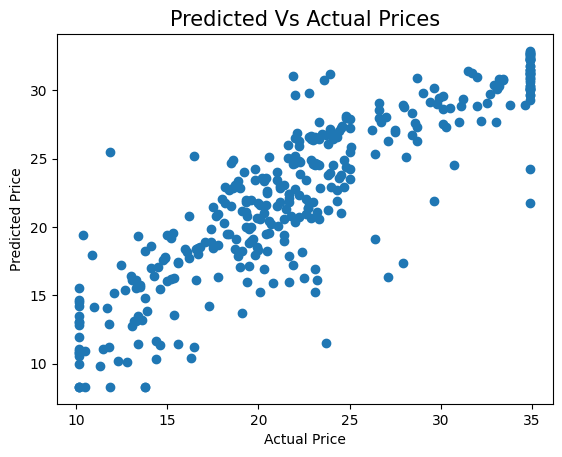

In [55]:

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

In [56]:
ytest_pred=lr.predict(xtest)

lin_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",lin_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

R^2:  0.6997582362305644
Adusted R^2:  0.6915883923184709
MAE:  2.9529104957019094
MSE:  13.294449553609889
RMSE:  3.6461554483606275


In [57]:
print(metrics.max_error(ytest, ytest_pred))

12.579386511503579


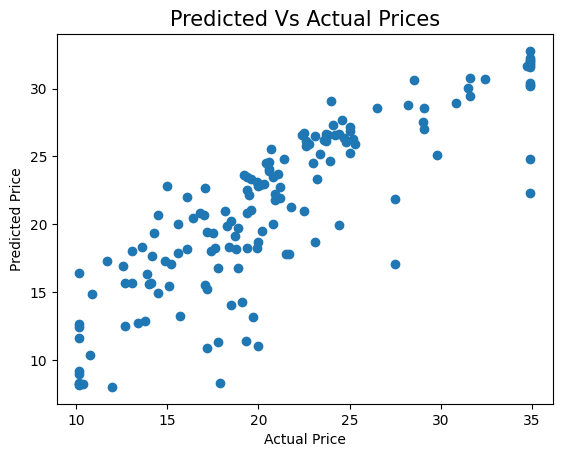

In [58]:
plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()
